In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import cohen_kappa_score
from tqdm import tqdm
from statistics import mean, stdev

In [2]:
import re
def map_fn(row):
    row = str(row)
    if(re.search('yes', row) and re.search('no', row)):
        return None
    elif(re.search('yes', row)):
        return 1
    elif(re.search('no', row)):
        return 0
    elif(re.search('hateful', row)):
        return 1
    elif(re.search('non-hateful', row)):
        return 1
    elif(re.search('hate.', row)):
        return 1

    return None

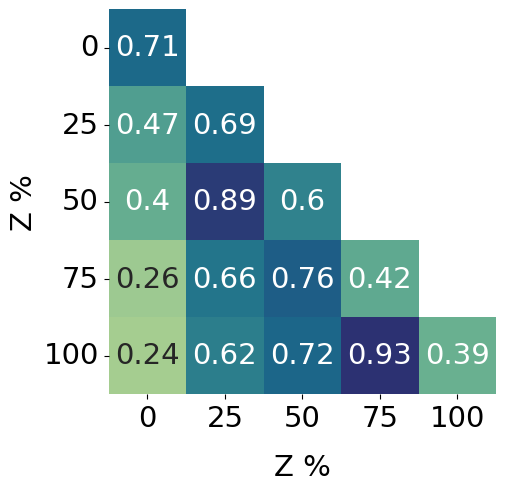

In [6]:
# Flan T5 XXL H
plt.figure(figsize=(5,5))

files = ['P1_'+str(i) for i in range(1,6)]
df_xxl = pd.DataFrame()
df_xxl['label'] = pd.read_excel('../RQ_NC/OS_LLMs/P_base.xlsx')['flan-t5-xxl'].apply(map_fn)

for i in files:
    df = pd.read_excel('../RQ_NC/OS_LLMs/'+i+'.xlsx')
    df_xxl[i] = df['flan-t5-xxl'].apply(map_fn)   
df_xxl = df_xxl.dropna()

labels = df_xxl.label
df_xxl = df_xxl[files]

#df_xxl = df_xxl.dropna()
IAA = np.zeros((5,5))
for i in range(len(files)):
    for j in range(len(files)):
        IAA[i][j] = np.round(cohen_kappa_score(df_xxl[files[i]], df_xxl[files[j]]), 2)
        if(i==j):
            IAA[i][j] = np.round(cohen_kappa_score(labels, df_xxl[files[j]]), 2)
        if(j>i):
            IAA[i][j] = np.nan

plt.grid(False)
c=[0, 25, 50, 75, 100]

hm = sns.heatmap(IAA, xticklabels=c, yticklabels=c, cmap="crest", annot=True, annot_kws={"size": 21}, cbar=False)
plt.xlabel('Z %', labelpad=15, fontsize=21)
plt.ylabel('Z %', fontsize=21)
plt.xticks(rotation=0, fontsize=21)
plt.yticks(rotation=0, fontsize=21)

cbar = hm.collections[0].colorbar
#cbar.ax.tick_params(labelsize=21)

plt.savefig('NC/NC_heatmap_T5_H.pdf', format='pdf', bbox_inches='tight')

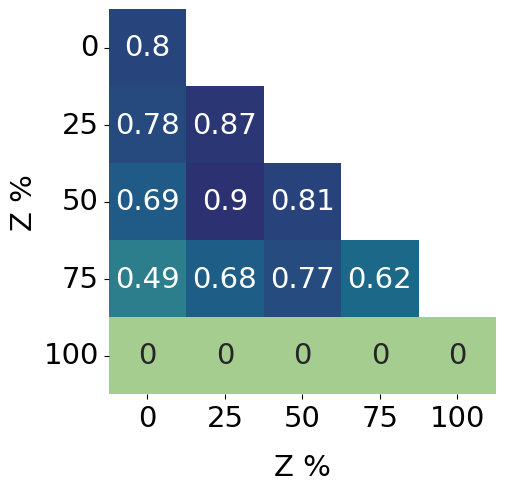

In [8]:
# Flan T5 XXL NH
plt.figure(figsize=(5,5))
files = ['P2_'+str(i) for i in range(1,6)]
df_xxl = pd.DataFrame()
df_xxl['label'] = pd.read_excel('../RQ_NC/OS_LLMs/P_base.xlsx')['flan-t5-xxl'].apply(map_fn)

for i in files:
    df = pd.read_excel('../RQ_NC/OS_LLMs/'+i+'.xlsx')
    df_xxl[i] = df['flan-t5-xxl'].apply(map_fn)   
df_xxl = df_xxl.dropna()

labels = df_xxl.label
df_xxl = df_xxl[files]

#df_xxl = df_xxl.dropna()
IAA = np.zeros((5,5))
for i in range(len(files)):
    for j in range(len(files)):
        IAA[i][j] = np.round(cohen_kappa_score(df_xxl[files[i]], df_xxl[files[j]]), 2)
        if(i==j):
            IAA[i][j] = np.round(cohen_kappa_score(labels, df_xxl[files[j]]), 2)
        if(j>i):
            IAA[i][j] = np.nan

plt.grid(False)
c=[0, 25, 50, 75, 100]

hm = sns.heatmap(IAA, xticklabels=c, yticklabels=c, cmap="crest", annot=True, annot_kws={"size": 21}, cbar=False)
plt.xlabel('Z %', labelpad=15, fontsize=21)
plt.ylabel('Z %', fontsize=21)
plt.xticks(rotation=0, fontsize=21)
plt.yticks(rotation=0, fontsize=21)

cbar = hm.collections[0].colorbar
#cbar.ax.tick_params(labelsize=21)

plt.savefig('NC/NC_heatmap_T5_NH.pdf', format='pdf', bbox_inches='tight')

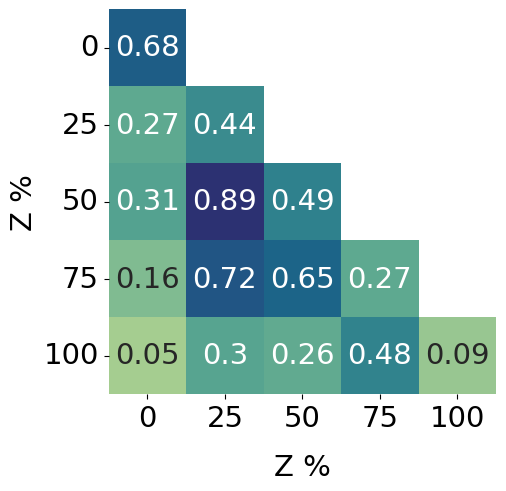

In [9]:
# ChatGPT H
plt.figure(figsize=(5,5))
files = ['P1_'+str(i) for i in range(1,6)]
df_xxl = pd.DataFrame()
df_xxl['label'] = pd.read_excel('../RQ_NC/ChatGPT/P_base.xlsx')['cgpt'].apply(map_fn)

for i in files:
    df = pd.read_excel('../RQ_NC/ChatGPT/'+i+'.xlsx')
    df_xxl[i] = df['cgpt'].apply(map_fn)   
df_xxl = df_xxl.dropna()

labels = df_xxl.label
df_xxl = df_xxl[files]

#df_xxl = df_xxl.dropna()
IAA = np.zeros((5,5))
for i in range(len(files)):
    for j in range(len(files)):
        IAA[i][j] = np.round(cohen_kappa_score(df_xxl[files[i]], df_xxl[files[j]]), 2)
        if(i==j):
            IAA[i][j] = np.round(cohen_kappa_score(labels, df_xxl[files[j]]), 2)
        if(j>i):
            IAA[i][j] = np.nan

plt.grid(False)
c=[0, 25, 50, 75, 100]

hm = sns.heatmap(IAA, xticklabels=c, yticklabels=c, cmap="crest", annot=True, annot_kws={"size": 21}, cbar=False)
plt.xlabel('Z %', labelpad=15, fontsize=21)
plt.ylabel('Z %', fontsize=21)
plt.xticks(rotation=0, fontsize=21)
plt.yticks(rotation=0, fontsize=21)

cbar = hm.collections[0].colorbar
#cbar.ax.tick_params(labelsize=21)

plt.savefig('NC/NC_heatmap_GPT_H.pdf', format='pdf', bbox_inches='tight')

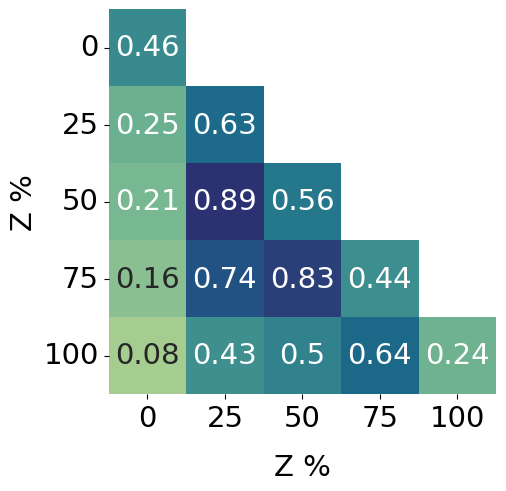

In [10]:
# ChatGPT NH
plt.figure(figsize=(5,5))
files = ['P2_'+str(i) for i in range(1,6)]
df_xxl = pd.DataFrame()
df_xxl['label'] = pd.read_excel('../RQ_NC/ChatGPT/P_base.xlsx')['cgpt'].apply(map_fn)

for i in files:
    df = pd.read_excel('../RQ_NC/ChatGPT/'+i+'.xlsx')
    df_xxl[i] = df['cgpt'].apply(map_fn)   
df_xxl = df_xxl.dropna()

labels = df_xxl.label
df_xxl = df_xxl[files]

#df_xxl = df_xxl.dropna()
IAA = np.zeros((5,5))
for i in range(len(files)):
    for j in range(len(files)):
        #print(files[i],files[j])
            
        IAA[i][j] = np.round(cohen_kappa_score(df_xxl[files[i]], df_xxl[files[j]]), 2)
        if(i==j):
            IAA[i][j] = np.round(cohen_kappa_score(labels, df_xxl[files[j]]), 2)
        if(j>i):
            IAA[i][j] = np.nan

plt.grid(False)
c=[0, 25, 50, 75, 100]

hm = sns.heatmap(IAA, xticklabels=c, yticklabels=c, cmap="crest", annot=True, annot_kws={"size": 21}, cbar=False)
plt.xlabel('Z %', labelpad=15, fontsize=21)
plt.ylabel('Z %', fontsize=21)
plt.xticks(rotation=0, fontsize=21)
plt.yticks(rotation=0, fontsize=21)

cbar = hm.collections[0].colorbar
#cbar.ax.tick_params(labelsize=21)

plt.savefig('NC/NC_heatmap_GPT_NH.pdf', format='pdf', bbox_inches='tight')

In [7]:
# Temp Analysis over H
files = ['P1_'+str(i) for i in range(1,6)]

data = {}
for f in tqdm(files):
    df = pd.read_excel('../RQ_NC/Temp_Variations/'+f+'.xlsx')
    col = df.columns[2:]

    for i in col:
        df[i] = df[i].apply(lambda x: str(x).lower())
        df[i] = df[i].map({'yes':0, 'no':1})
    
    hs_perc = []
    for i in col:
        x = df[i].dropna()
        hs_perc.append(x[x==0].shape[0]/x.shape[0])

    data[f] = hs_perc

for f in files:
    print(f,'  mean: ',mean(data[f]), 'stdev: ', stdev(data[f]))

100%|██████████| 5/5 [01:50<00:00, 22.15s/it]

P1_1   mean:  0.44517942498122814 stdev:  0.007774599143815187
P1_2   mean:  0.6724221024172689 stdev:  0.03720514954188865
P1_3   mean:  0.7183612189537363 stdev:  0.03685934643950255
P1_4   mean:  0.7936551299366301 stdev:  0.03919753627693547
P1_5   mean:  0.8074722843530528 stdev:  0.0385661669479761


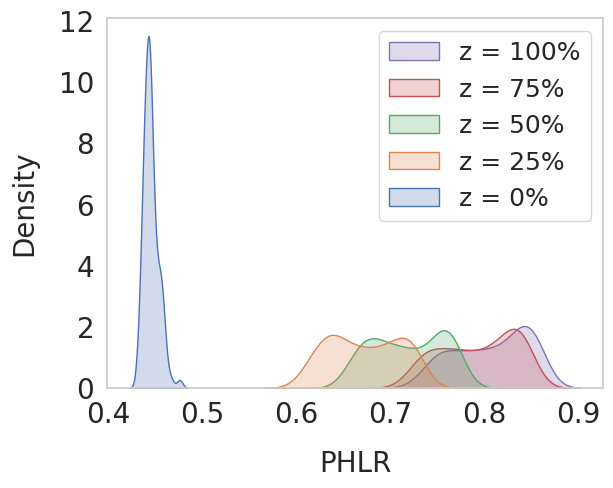

In [8]:
# Temp Variation plot H
df = pd.DataFrame(data).melt(var_name='Type', value_name='Data')

# Set the style of the plots
sns.set(style="whitegrid")
# Create a KDE plot
#plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Data', hue='Type', common_norm=True, fill=True)

# Set labels and title
#plt.title('Kernel Density Estimation Plot')
plt.xlabel('PHLR', fontsize=20, labelpad=15)
plt.ylabel('Density', fontsize=20, labelpad=15)

# Add a legend
plt.legend(['z = '+str(i)+'%' for i in range(100,-1,-25)], fontsize=18)#+['P02'])

plt.xticks(np.arange(0.4,1,0.1), fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)

#plt.show()
plt.savefig('NC/NC_density_H.pdf', format='pdf', bbox_inches='tight')

In [9]:
# Temp Analysis over H
files = ['P2_'+str(i) for i in range(1,6)]

data = {}
for f in tqdm(files):
    df = pd.read_excel('../RQ_NC/Temp_Variations/'+f+'.xlsx')
    col = df.columns[2:]

    for i in col:
        df[i] = df[i].apply(lambda x: str(x).lower())
        df[i] = df[i].map({'yes':0, 'no':1})
    
    hs_perc = []
    for i in col:
        x = df[i].dropna()
        hs_perc.append(x[x==0].shape[0]/x.shape[0])

    data[f] = hs_perc

for f in files:
    print(f,'  mean: ',mean(data[f]), 'stdev: ', stdev(data[f]))

100%|██████████| 5/5 [01:52<00:00, 22.59s/it]

P2_1   mean:  0.7667935898346917 stdev:  0.06757460896801491
P2_2   mean:  0.5630257412106631 stdev:  0.023956498385596457
P2_3   mean:  0.5771172749250134 stdev:  0.06550462428003025
P2_4   mean:  0.44252845834902915 stdev:  0.007810882202461303
P2_5   mean:  0.10976377840290483 stdev:  0.07954329349998349


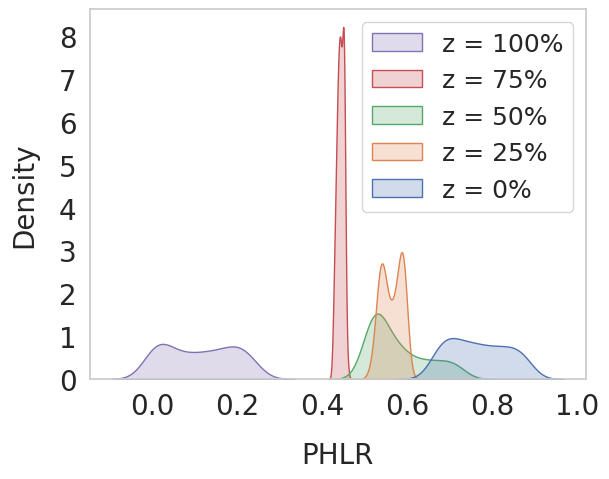

In [10]:
# Temp Variation plot H
df = pd.DataFrame(data).melt(var_name='Type', value_name='Data')

# Set the style of the plots
sns.set(style="whitegrid")

# Create a KDE plot
#plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Data', hue='Type', common_norm=True, fill=True)

# Set labels and title
#plt.title('Kernel Density Estimation Plot')
plt.xlabel('PHLR', fontsize=20, labelpad=15)
plt.ylabel('Density', fontsize=20, labelpad=15)

# Add a legend
plt.legend(['z = '+str(i)+'%' for i in range(100,-1,-25)], fontsize=18)#+['P02'])

plt.xticks(np.arange(0,1.1,0.2), fontsize=20)
plt.yticks(fontsize=20)

plt.grid(False)
#plt.show()
plt.savefig('NC/NC_density_NH.pdf', format='pdf', bbox_inches='tight')